In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns

In [27]:
data=pd.read_csv('Salaries.csv')
print(data)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]


C:\Users\vhsat\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


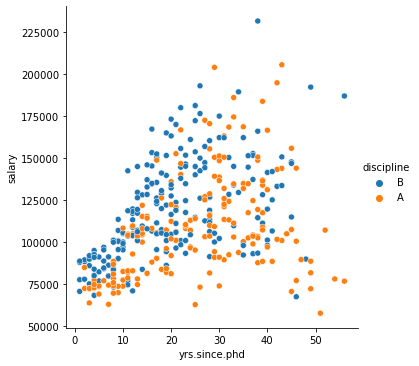

In [28]:
sns.relplot("yrs.since.phd","salary",data=data,hue="discipline")

C:\Users\vhsat\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


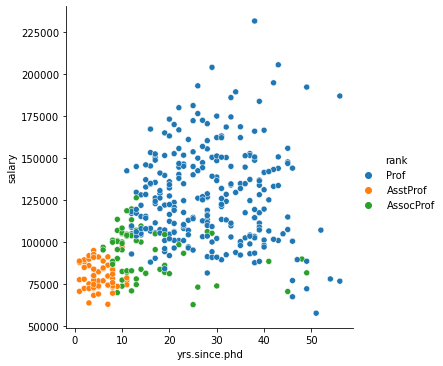

In [29]:
sns.relplot("yrs.since.phd","salary",data=data,hue="rank")

In [30]:
rank=pd.get_dummies(data["rank"])
print(rank.head(5))

   AssocProf  AsstProf  Prof
0          0         0     1
1          0         0     1
2          0         1     0
3          0         0     1
4          0         0     1


In [31]:
rank=pd.get_dummies(data["rank"],drop_first=True)
print(rank.head(5))

   AsstProf  Prof
0         0     1
1         0     1
2         1     0
3         0     1
4         0     1


C:\Users\vhsat\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


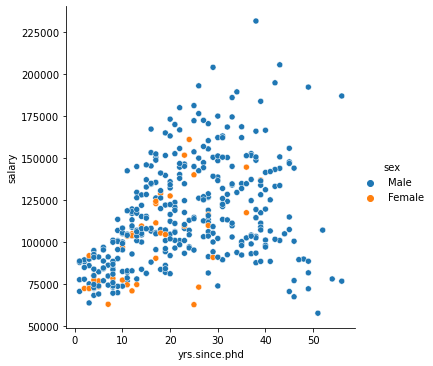

In [32]:
sns.relplot("yrs.since.phd","salary",data=data,hue="sex")

In [33]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [34]:
data=pd.concat([data,rank],axis=1)
print(data.head())

       rank discipline  yrs.since.phd  yrs.service   sex  salary  AsstProf  \
0      Prof          B             19           18  Male  139750         0   
1      Prof          B             20           16  Male  173200         0   
2  AsstProf          B              4            3  Male   79750         1   
3      Prof          B             45           39  Male  115000         0   
4      Prof          B             40           41  Male  141500         0   

   Prof  
0     1  
1     1  
2     0  
3     1  
4     1  


In [35]:
data.drop(["rank","discipline","sex"],axis=1,inplace=True)
print(data.head())

   yrs.since.phd  yrs.service  salary  AsstProf  Prof
0             19           18  139750         0     1
1             20           16  173200         0     1
2              4            3   79750         1     0
3             45           39  115000         0     1
4             40           41  141500         0     1


In [36]:
x=data.drop("salary",axis=1)
y=data["salary"]
print(x.head())
print(y.head())

   yrs.since.phd  yrs.service  AsstProf  Prof
0             19           18         0     1
1             20           16         0     1
2              4            3         1     0
3             45           39         0     1
4             40           41         0     1
0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [39]:
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [40]:
predictions = lm.predict(x_test)
print(predictions[:5])
print(y_test.head())

[ 92077.90944103  78744.00578621 124730.11541787  78319.18486195
 125200.42849481]
174    105000
359     78785
250    109000
274     78500
283    155865
Name: salary, dtype: int64


In [41]:
lm.score(x_test,y_test)

0.411267811584926